In [2]:
from pyeed.core import ProteinInfo, Alignment
from pyeed.aligners import PairwiseAligner
from pyeed.network import SequenceNetwork

In [8]:
# Accessions from different methionine adenyltransferases
mat_accessions = [
    "MBP1912539.1",
    "SEV92896.1",
    "MBO8174569.1",
    "WP_042680787.1",
    "NPA47376.1",
    "WP_167889085.1",
    "WP_048165429.1",
    "ACS90033.1",
]
mats = ProteinInfo.get_ids(mat_accessions)

⬇️ Fetching 8 protein entries from NCBI...
⬇️ Fetching 8 taxonomy entries from NCBI...


In [13]:
print(mats[0])

ProteinInfo
├── id = proteininfo16
├── source_id = MBP1912539.1
├── name = S-adenosylmethionine synthetase
├── sequence = MLMAEKIRNIVVEEMVRTPVEMQQVELVERKGIGHPDSIADGIAEAVSRALSREYMKRYGIILHHNTDQVEVVGGRAYPQFGGGEVIKPIYILLSGRAVEMVDREFFPVHEVAIKAAKDYLKKAVRHLDIENHVVIDSRIGQGSVDLVGVFNKAKKNPIPLANDTSFGVGYAPLSETERIVLETEKYLNSDEFKKKWPAVGEDIKVMGLRKGDEIDLTIAAAIVDSEVDNPDDYMAVKEAIYEAAKEIVESHTQRPTNIYVNTADDPKEGIYYITVTGTSAEAGDDGSVGRGNRVNGLITPNRHMSMEAAAGKNPVSHVGKIYNILSMLIANDIAEQIEGVEEVYVRILSQIGKPIDEPLVASVQIIPKKGYSIDVLQKPAYEIADEWLANITKIQKMILEDKINVF
├── organism
│   └── Organism
│       ├── id = organism40
│       ├── name = Thermococcus stetteri
│       ├── taxonomy_id = 49900
│       ├── domain = Archaea
│       ├── phylum = Euryarchaeota
│       ├── tax_class = Thermococci
│       ├── order = Thermococcales
│       ├── family = Thermococcaceae
│       ├── genus = Thermococcus
│       └── species = Thermococcus stetteri
├── citation
│   └── Citation
│       └── id = citation16
├── coding_sequence_ref
│   └── 

In [9]:
# Create pairwise alignments between all sequences
alignments = Alignment.from_sequences(mats, aligner=PairwiseAligner)

⛓️ Running pairwise alignments: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 4045.49it/s]


In [10]:
# Create a network
network = SequenceNetwork(
    sequences=mats,
    pairwise_alignments=alignments,
    weight="identity",
    threshold=0.9,
    dimensions=2,
    color="taxonomy_id",
)

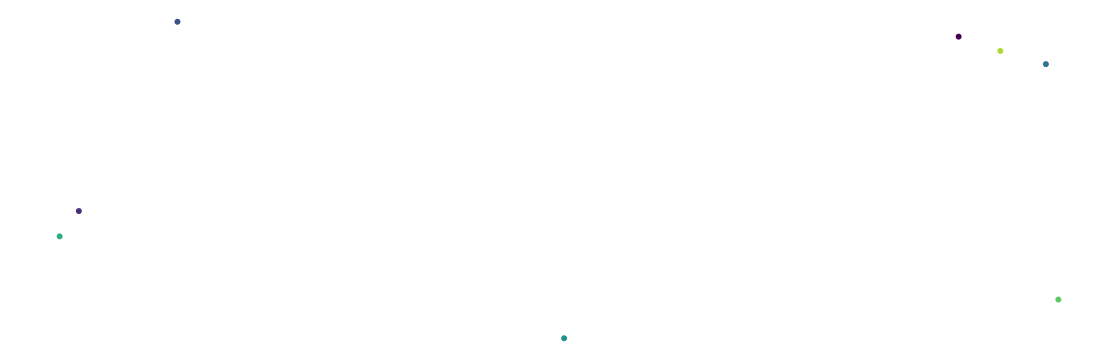

In [11]:
# Visualize the network
network.visualize()